<a href="https://colab.research.google.com/github/NeZorinEgor/Computer-vision/blob/main/ChainAlgorithm/ChainAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

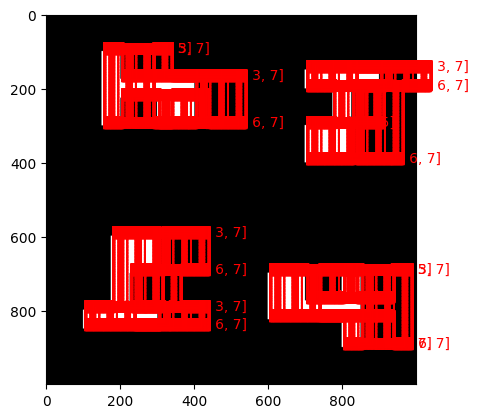

In [14]:
import numpy as np
import matplotlib.pyplot as plt

directions = {
    0: (0, 1),    # Движение вправо
    1: (-1, 1),   # Движение в правый верхний угол
    2: (-1, 0),   # Движение вверх
    3: (-1, -1),  # Движение в левый верхний угол
    4: (0, -1),   # Движение влево
    5: (1, -1),   # Движение в левый нижний угол
    6: (1, 0),    # Движение вниз
    7: (1, 1)     # Движение в правый нижний угол
}

data = np.load('similar.npy')

# Нахождение периметра
def find_perimeter_transitions(data):
    perimeter_transitions = []

    perimeter_points = np.argwhere(data == 1)

    if len(perimeter_points) == 0:
        return perimeter_transitions

    rows, cols = data.shape

    for point in perimeter_points:
        y, x = point
        transitions = []

        for i in range(8):
            dy, dx = directions[i]
            ny, nx = y + dy, x + dx

            if 0 <= ny < rows and 0 <= nx < cols:
                if data[y, x] == 1 and data[ny, nx] == 0:
                    transitions.append(i)

        if transitions:
            perimeter_transitions.append((point, transitions))

    return perimeter_transitions

perimeter_transitions = find_perimeter_transitions(data)

plt.imshow(data, cmap='gray')

for point, transitions in perimeter_transitions:
    y, x = point
    plt.text(x, y, str(transitions), color='red')

plt.show()
